# Summing a large number of random variables.

By building a large dataset of the mean of uniform random numbers we demonstrate both the law of large numbers and the central limit theorem. Since it takes a while to generate the dataset, we save it as a file. 

JMA Feb 2024




In [162]:
# An example of the typical imports for data science notebook
# not all will be used here

# Import python standard library
import re, os, sys, time
import math
from pathlib import Path

# Import array and dataframe packages
import numpy as np
from numpy.random import default_rng
import pandas as pd

# Import ML & stats packages
import sklearn as sk
import scipy as sp     # for the binom(n,k) function

# Import the bokeh python wrappers for javascript plots
#  - a preferred visualization tool
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, VBar, Circle
from bokeh.io import output_notebook
output_notebook()

# Run the iterations up to n = 10
sample_max = 10000
DATA_PATH = f'./sample_{sample_max}'

Loading BokehJS ...

In [8]:
uniform_sample = [np.random.uniform() for _ in range(sample_max)]
uniform_df = pd.DataFrame(uniform_sample, columns=['uniform_rv'])
uniform_df.to_csv(DATA_PATH + 'uniform.csv', sep='\t',header=True)

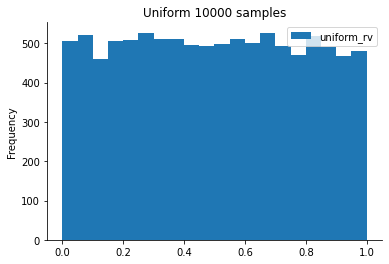

In [9]:
from matplotlib import pyplot as plt
uniform_df.plot(kind='hist', bins=20, title='Uniform 10000 samples')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
def mean_replications(r = sample_max):
  return np.mean([np.random.uniform() for _ in range(r)])

sample_mean = pd.DataFrame([mean_replications() for s in range(sample_max)], columns= ['mean'])
sample_mean.to_csv(DATA_PATH + 'mean.csv', sep='\t', header=True)



In [147]:
sample_mean.describe()

,mean
count,10000.000000
mean,0.500012
std,0.002874
min,0.489181
25%,0.498110
50%,0.499980
75%,0.501910
max,0.512106


In [156]:
# Use pandas cut function to create a histogram df
def count_bins(the_array, bins=110):
    df = pd.DataFrame({'density': the_array, 'bins': pd.cut(the_array, bins= np.linspace(min(the_array), max(the_array), bins))})
    hist_df = df.groupby('bins').count()/df['density'].sum()
    hist_df.reset_index(inplace=True)
    # Change bin type from pandas Intervals to strings.  
    # bokeh ColumnDataStore chokes on Interval types
    # Instead change them to strings
    hist_df['bins'] = hist_df['bins'].astype('string')
    return hist_df 

count_bins(sample_mean['mean']).head()

,bins,density
0,"(0.4892, 0.4894]",0.0000
1,"(0.4894, 0.4896]",0.0000
2,"(0.4896, 0.4898]",0.0000
3,"(0.4898, 0.49]",0.0000
4,"(0.49, 0.4902]",0.0002


In [159]:
# Sometimes we want to see what a ColumnDataSource contains
hist_src = ColumnDataSource(count_bins(sample_mean['mean'], bins= 110))
# View the variables' names
hist_src.data['bins']

<StringArray>
['(0.4892, 0.4894]', '(0.4894, 0.4896]', '(0.4896, 0.4898]',
   '(0.4898, 0.49]',   '(0.49, 0.4902]', '(0.4902, 0.4904]',
 '(0.4904, 0.4907]', '(0.4907, 0.4909]', '(0.4909, 0.4911]',
 '(0.4911, 0.4913]',
 ...
   '(0.51, 0.5102]', '(0.5102, 0.5104]', '(0.5104, 0.5106]',
 '(0.5106, 0.5108]', '(0.5108, 0.5111]', '(0.5111, 0.5113]',
 '(0.5113, 0.5115]', '(0.5115, 0.5117]', '(0.5117, 0.5119]',
 '(0.5119, 0.5121]']
Length: 109, dtype: string

In [161]:
cds = ColumnDataSource(count_bins(sample_mean['mean']))

p = figure(x_range= list(cds.data['bins']), width=1000)
glyph = VBar(x='bins', top='density', bottom=0, width=1, fill_color='limegreen', line_width=0)
p.add_glyph(cds, glyph)
show(p)

In [165]:
cds = ColumnDataSource(count_bins(sample_mean['mean']))
cds.data['log_density']  = np.log(cds.data['density'])

p = figure(x_range= list(cds.data['bins']), width=1000)
glyph = Circle(x='bins', y='log_density', size=5, fill_color='darkred', line_width=0)
p.add_glyph(cds, glyph)
show(p)

/var/folders/x3/t7qpngm57q96p9wxzg9rqv6h0000gp/T/ipykernel_26140/1544274805.py:2: RuntimeWarning: divide by zero encountered in log
  cds.data['log_density']  = np.log(cds.data['density'])
